In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('Supplemental_Table_S2.xls')


In [8]:
grouped = df.groupby('Antibody')
group_nsc = grouped["SSP-NSC"]
#group_rsc = grouped["SSP-RSC"]

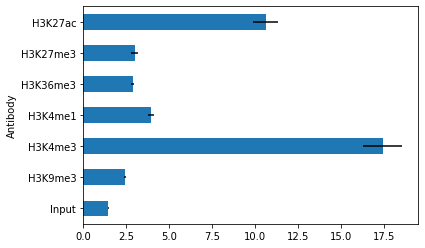

In [12]:
# エラーバーを表示
sem = group_nsc.std()/np.sqrt(group_nsc.count())
ax1 = group_nsc.mean().plot(kind='barh', xerr=sem)
ax1.invert_yaxis()


In [10]:
# お題１：下の図を作成するコードを考える。



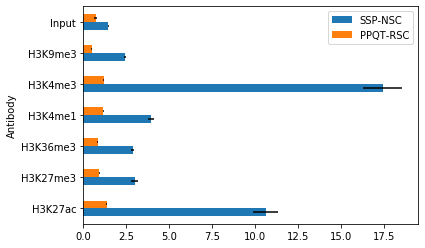

In [151]:
#Sakataniーsan’s
grouped = df[["Antibody","SSP-NSC","PPQT-RSC"]]
grouped = grouped.groupby('Antibody')
sem= grouped.std()/np.sqrt(grouped.count())
grouped.mean().plot.barh(xerr=sem)

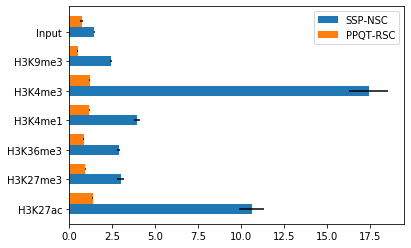

In [139]:
group_rsc = grouped["PPQT-RSC"]
sem1 = group_nsc.std()/np.sqrt(group_nsc.count())
N=len(grouped)
fig, ax = plt.subplots()
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
nsc_means=group_nsc.mean()
ax.barh(ind, nsc_means, width, xerr=sem1, label='SSP-NSC')
sem2 = group_rsc.std()/np.sqrt(group_rsc.count())
rsc_means = group_rsc.mean()
ax.barh(ind + width, rsc_means, width,xerr=sem2,
       label='PPQT-RSC')
ylabels = ["H3K27ac", "H3K27me3", "H3K36me3", "H3K4me1", "H3K4me3", "H3K9me3", "Input"]
ax.yaxis.set_ticklabels(ylabels)
ax.yaxis.set_ticks([0,1,2,3,4,5,6])
ax.legend()

In [ ]:
# お題２；お題１で作った図について、エラーバーを標準誤差（SEM）から信頼区間（CI）に変更する。

In [154]:
#Sakatani-san's code #1/3
from scipy import stats
ci = stats.t.interval(alpha= 0.95,df= grouped.count(),loc = grouped.mean(),scale = sem)
print(ci)

(array([[ 9.18769708,  1.32600201],
       [ 2.60194768,  0.87415809],
       [ 2.72844675,  0.78622039],
       [ 3.5939241 ,  1.12616298],
       [15.20304889,  1.15759962],
       [ 2.27392187,  0.456175  ],
       [ 1.38184169,  0.54966086]]), array([[12.06928435,  1.43532961],
       [ 3.40106649,  1.0231689 ],
       [ 3.02945277,  0.88789437],
       [ 4.32272047,  1.20217576],
       [19.65997819,  1.20729217],
       [ 2.57956459,  0.56165916],
       [ 1.5218098 ,  0.92300826]]))


In [156]:
#指定する信頼区間をdataframeにする #2/3
antibody_list = list(df["Antibody"].unique())
ci_df = pd.DataFrame(ci[0], columns = ["SSP-NSC","PPQT-RSC"],index = antibody_list)
ci_df= grouped.mean() - ci_df

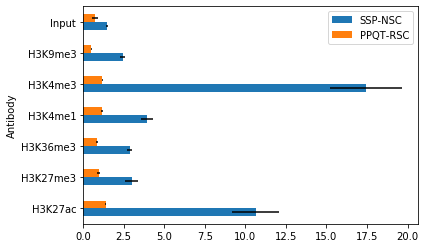

In [157]:
grouped.mean().plot.barh(xerr= ci_df) #3/3

In [94]:
from scipy import stats
group_nsc = grouped["SSP-NSC"]
nsc_means = group_nsc.mean()
sem1 = group_nsc.std()/np.sqrt(group_nsc.count())
ci_nsc = stats.t.interval(0.95, group_nsc.count()-1, loc= group_nsc.mean(), scale=sem1)
group_rsc = grouped["PPQT-RSC"]
rsc_means = group_rsc.mean()
sem2 = group_rsc.std()/np.sqrt(group_rsc.count())
ci_rsc = stats.t.interval(0.95, group_rsc.count()-1, loc= group_rsc.mean(), scale=sem2)

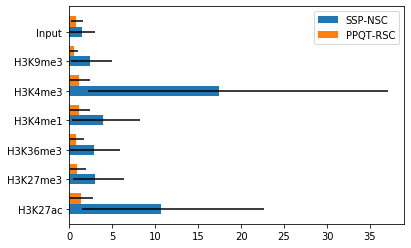

In [158]:
group_rsc = grouped["PPQT-RSC"]
sem1 = group_nsc.std()/np.sqrt(group_nsc.count())
#N=len(grouped)
fig, ax = plt.subplots()
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
nsc_means=group_nsc.mean()
ax.barh(ind, nsc_means, width, xerr=ci_nsc, label='SSP-NSC')
sem2 = group_rsc.std()/np.sqrt(group_rsc.count())
rsc_means = group_rsc.mean()
ax.barh(ind + width, rsc_means, width,xerr=ci_rsc,
       label='PPQT-RSC')
ylabels = ["H3K27ac", "H3K27me3", "H3K36me3", "H3K4me1", "H3K4me3", "H3K9me3", "Input"]
ax.yaxis.set_ticklabels(ylabels)
ax.yaxis.set_ticks([0,1,2,3,4,5,6])
ax.legend()


In [159]:
# お題３：logスケールboxplotで外れ値を非表示にするオプションを調べる。
#plt.boxplot(x, sym="")->#sym=""で外れ値を表示しない
# 問：外れ値を表示した方がよい場合と、非表示にした方がよい場合はそれぞれどのようなケースか。

外れ値を表示した方がよい場合
通常は外れ値を表示し他方が良い。
外れ値を非表示にした方がよい場合はそれぞれどのようなケースか。
n数が多すぎてグラフが見辛くなる場合や、異常離れた場所に外れ値がある場合は非表示にする。

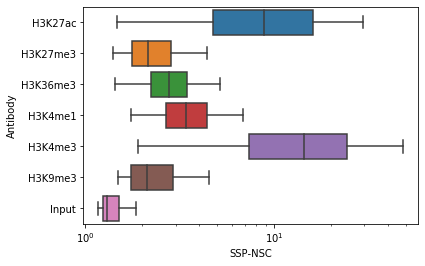

In [160]:
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 4))
ax.set_xscale("log")
sns.boxplot(data=df, x='SSP-NSC', y='Antibody', sym="")
#sns.boxplot(data=df, x='SSP-NSC', y='Antibody')

In [161]:
# お題４：logスケールboxplotをviolin plotに変更する。
# 問：boxplotが望ましい場合とviolin plotが望ましい場合の例を考える。

#boxplotが望ましい場合
#2種類のカテゴリデータを含んだ数値データのばらつきを可視化するのに適している。
#violin plotが望ましい場合
#boxplotと同様に，２種類のカテゴリデータを含んだ数値データの違いを可視化。こちらは各数値データを分布として表現。

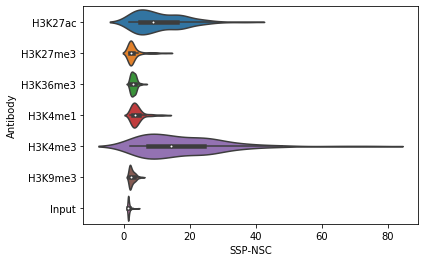

In [163]:
import seaborn as sns
#f, ax = plt.subplots(figsize=(6, 4))
ax.set_xscale("log")
sns.violinplot(data=df, x='SSP-NSC', y='Antibody',scale="width", cut=2)
#sns.despine(offset=10, trim=True)

In [115]:
# お題５：SSP_Fig2Bを自分で作成してみる。

In [147]:
df = pd.read_excel('Supplemental_Table_S2.xls')
grouped = df.groupby('Antibody')
df_mean=grouped.mean()
df_mean
#ax1 = fig.add_subplot(3, 2, 1)
#(1,1,1)SSP-NSC(log)xAntibody boxplot
#(1,1,2)PPQT-NSC(log)xAntibody
#(1,1,3)Q-RSCxAntibody
#(1,2,1)SSP-RSCxAntibody
#(1,2,2)PPQT-RSCxAntibody
#(1,2,3)JSDxAntibody

,total read number,depth,Genome coverage,GC,FRiP (MACS2),FRiP (DROMPA),SSP-NSC,SSP-RSC,Background uniformity,FCS,Q-RSC,JSD,PPQT-NSC,PPQT-RSC,PPQT-Qtag,MACS2 peaks,DROMPA peaks
Antibody,,,,,,,,,,,,,,,,,
H3K27ac,2.384815e+07,1.398776,0.614592,48.867347,0.335627,0.263551,10.628491,1.234265,0.995833,0.480609,1.588031,0.429483,1.334308,1.380666,1.156250,77635.040816,28135.693878
H3K27me3,2.596955e+07,1.527559,0.731969,48.622047,0.200243,0.052395,3.001507,1.000363,1.067237,0.218120,1.145181,0.313905,1.046741,0.948663,0.370079,64326.496063,8179.874016
H3K36me3,2.629578e+07,1.546929,0.681732,47.322835,0.360702,0.075709,2.878950,0.968197,1.009111,0.207656,1.023307,0.367337,1.043242,0.837057,0.173228,73186.866142,25472.173228
H3K4me1,2.635078e+07,1.549055,0.645748,49.370079,0.292206,0.122170,3.958322,1.110394,1.012135,0.221832,1.269055,0.396918,1.100633,1.164169,0.889764,146738.039370,29781.204724
H3K4me3,2.496305e+07,1.456614,0.650945,48.212598,0.356109,0.316061,17.431514,1.142460,1.026362,0.567865,1.291717,0.452481,1.580844,1.182446,0.921260,39963.314961,21664.724409
H3K9me3,2.558495e+07,1.502205,0.747717,46.992126,0.168276,0.026432,2.426743,0.737924,1.087738,0.203583,0.911780,0.289295,1.044851,0.508917,-0.614173,73990.716535,9008.362205
Input,2.638445e+07,1.553622,0.826850,45.291339,0.003821,0.013376,1.451826,0.868197,1.135877,0.068045,1.119764,0.213490,1.020571,0.736335,-0.440945,2059.976378,12303.070866


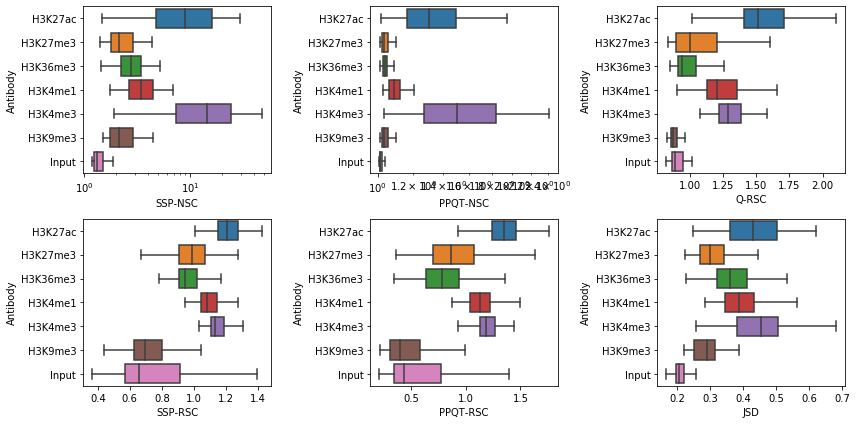

In [165]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
ax1.set_xscale("log")
ax2.set_xscale("log")
sns.boxplot(data=df, x='SSP-NSC', y='Antibody', sym="", ax=ax1)
sns.boxplot(data=df, x='PPQT-NSC', y='Antibody', sym="", ax=ax2)
sns. boxplot(data=df, x='Q-RSC', y='Antibody', sym="", ax=ax3)
sns. boxplot(data=df, x='SSP-RSC', y='Antibody', sym="", ax=ax4)
sns. boxplot(data=df, x='PPQT-RSC', y='Antibody', sym="", ax=ax5)
sns. boxplot(data=df, x='JSD', y='Antibody', sym="", ax=ax6)
ylabels = ["H3K27ac", "H3K27me3", "H3K36me3", "H3K4me1", "H3K4me3", "H3K9me3", "Input"]
ax.yaxis.set_ticklabels(ylabels)
fig.tight_layout()


In [ ]:
# お題６：H3K36me3, Input についてそれぞれ相関係数ヒートマップを描き、Antibodyごとの傾向の違いを観察する。

H3K36me3
Input

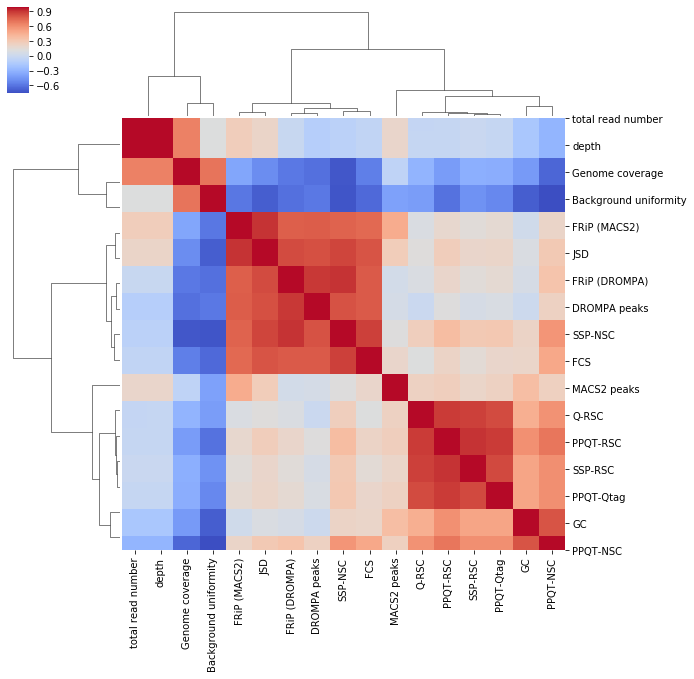

In [41]:
df_K36 = df[df['Antibody'] == 'H3K36me3']
df_Input = df[df['Antibody'] == 'Input']
#df_K36
#sns.heatmap(df_K36.corr())
# color paletteを変更
cmap = sns.color_palette("coolwarm", 200)
sns.clustermap(df_K36.corr(), method='ward', cmap=cmap)

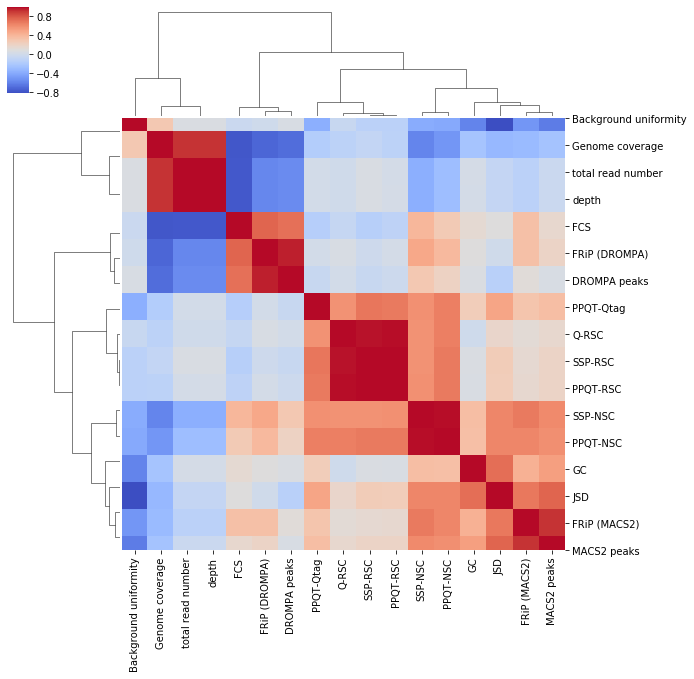

In [42]:
#df_Input
#sns.heatmap(df_Input.corr())
sns.clustermap(df_Input.corr(), method='ward', cmap=cmap)